In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test_features = pd.read_csv('/kaggle/input/titanic/test.csv')

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Basic EDA

In [4]:
def group_by(column, df=train):
    return df.groupby(column)['Survived'].mean()

group_by('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [5]:
group_by('Sex')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
group_by('SibSp')

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [7]:
group_by('Parch')

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [8]:
group_by('Embarked')

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

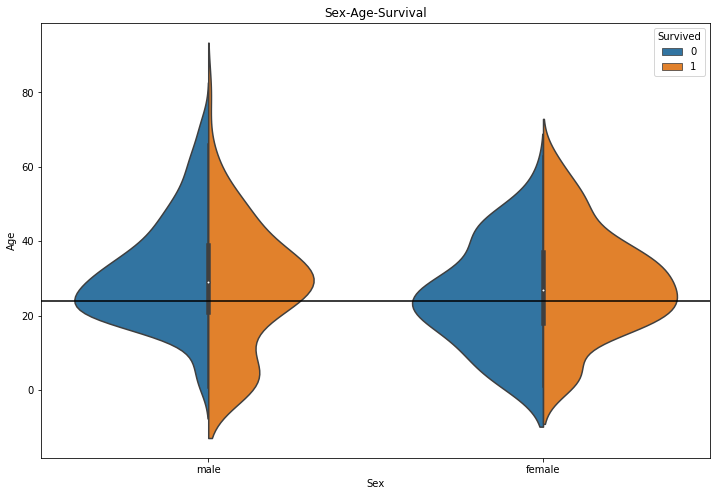

In [9]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True)
plt.title("Sex-Age-Survival")
plt.axhline(y=24, color='k')

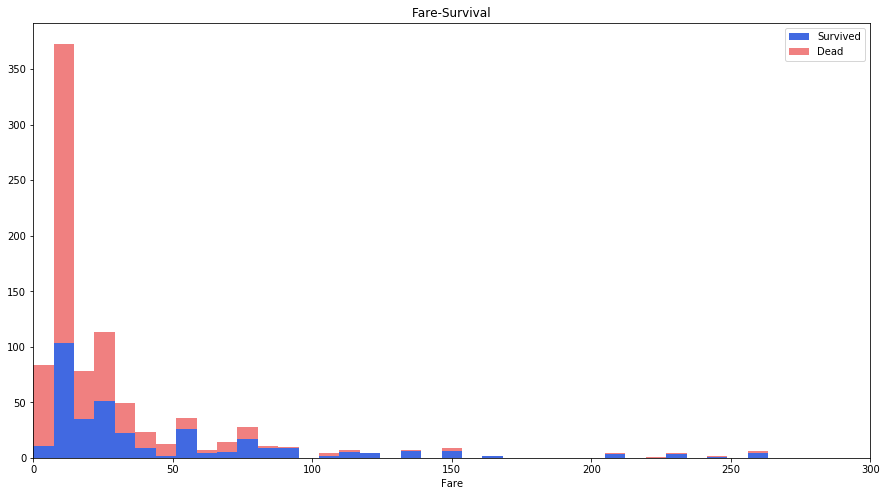

In [10]:
plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], stacked=True, 
         color=['royalblue', 'lightcoral'], bins=70, label=['Survived', 'Dead'])

plt.title("Fare-Survival")
plt.xlabel('Fare')
plt.xlim(0, 300)
plt.legend()

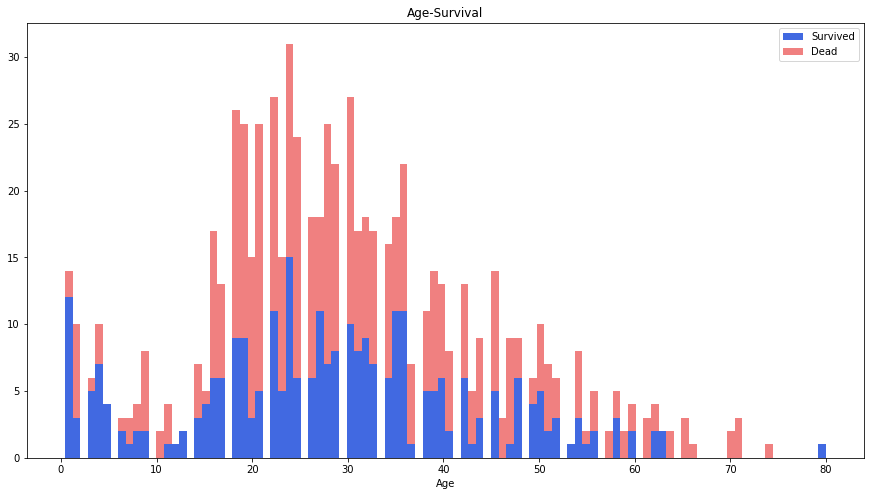

In [11]:
surv = train[train['Survived']==1]
dead = train[train['Survived']==0]

plt.figure(figsize=(15,8))
plt.hist([surv['Age'], dead['Age']], bins=100, stacked=True, label=['Survived', 'Dead'], color=['royalblue', 'lightcoral'])
plt.title('Age-Survival')
plt.xlabel('Age')
plt.legend()

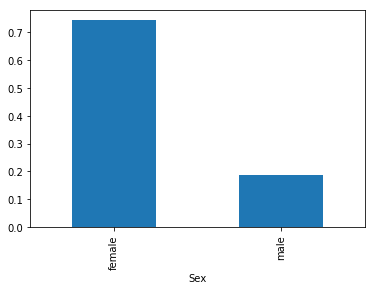

In [12]:
train.groupby('Sex')['Survived'].mean().plot(kind='bar')

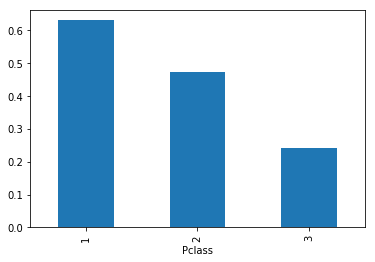

In [13]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')

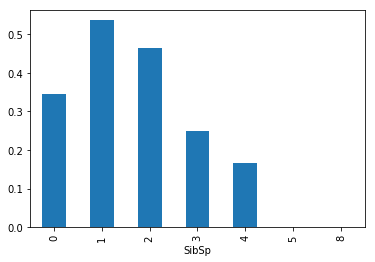

In [14]:
train.groupby('SibSp')['Survived'].mean().plot(kind='bar')

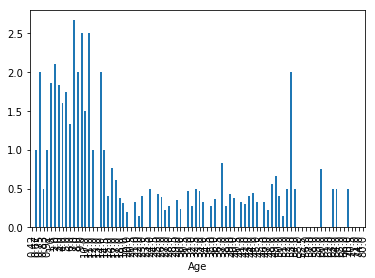

In [15]:
train.groupby('Age')['SibSp'].mean().plot(kind='bar')

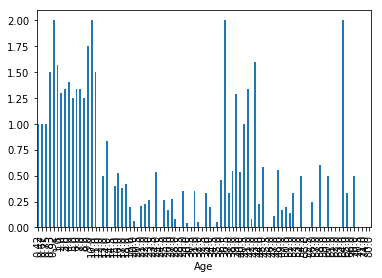

In [16]:
train.groupby('Age')['Parch'].mean().plot(kind='bar')

In [17]:
train.Age.max()

80.0

In [18]:
train.Age.min()

0.42

In [19]:
train['age_group'] = pd.cut(train['Age'], [8*x for x in range(11)], labels=['0-8', '8-16', '16-24', '24-32', '32-40',
                                                                   '40-48', '48-56', '56-64', '64-72', '72-100'])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,32-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,32-40


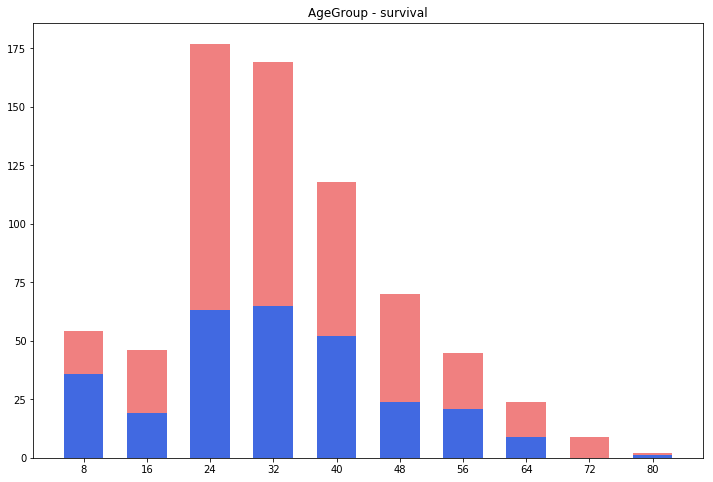

In [20]:
plt.figure(figsize=(12,8))
plt.bar([8*i for i in range(1, 11)], train[train['Survived']==1].groupby('age_group')['Sex'].count(), color='royalblue', width=5)
plt.bar([8*i for i in range(1, 11)], train[train['Survived']==0].groupby('age_group')['Sex'].count(), color='lightcoral', bottom=train[train['Survived']==1].groupby('age_group')['Sex'].count(), width=5)
plt.title("AgeGroup - survival")
plt.xticks(ticks=[8*i for i in range(1,11)])
plt.show()

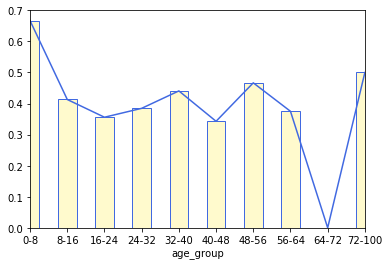

In [21]:
train.groupby('age_group').Survived.mean().plot(kind='bar', color='lemonchiffon', edgecolor='royalblue')
train.groupby('age_group').Survived.mean().plot(c='royalblue')

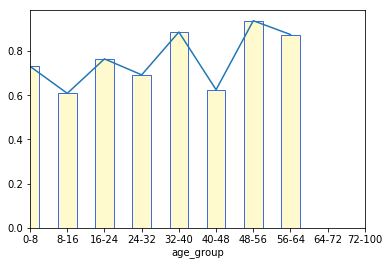

In [22]:
train[train['Sex']=='female'].groupby('age_group').Survived.mean().plot(kind='bar', color='lemonchiffon', edgecolor='royalblue')
train[train['Sex']=='female'].groupby('age_group').Survived.mean().plot()

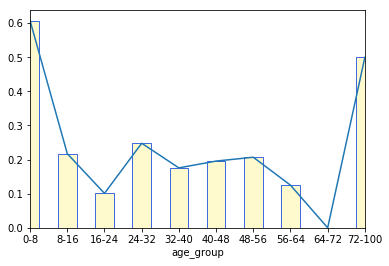

In [23]:
train[train['Sex']=='male'].groupby('age_group').Survived.mean().plot(kind='bar', color='lemonchiffon', edgecolor='royalblue')
train[train['Sex']=='male'].groupby('age_group').Survived.mean().plot()

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,32-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,32-40


In [25]:
def weak_ones(df):
    temp = dict()
    for i, v in df.iterrows():
        if (v['age_group'] in ['0-8', '72-100']) | (v['Sex'] == 'female'):
            temp[i] = 1
        else:
            temp[i]= 0
    return temp
            
dic = weak_ones(train)
dic[3]

1

In [26]:
x = pd.DataFrame({'weak': list(dic.values())}, index=list(dic.keys()))
x.head(3)

,weak
0,0
1,1
2,1


In [27]:
train = train.merge(x, how='left', left_index=True, right_index=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,weak
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,32-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,32-40,0


In [28]:
# train.drop(columns=['weak_x'], inplace=True)
# train.rename(columns={'weak_y': 'weak'}, inplace=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,weak
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32,1


In [29]:
train['family_member'] = train['SibSp'] + train['Parch'] + 1
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,weak,family_member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32,1,1


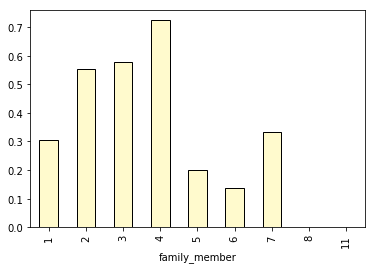

In [30]:
train.groupby('family_member')['Survived'].mean().plot(kind='bar', color='lemonchiffon', edgecolor='k')

In [31]:
train[train['Survived']==1].groupby('family_member')['Survived'].count()
train[train['Survived']==0].groupby('family_member')['Survived'].count()

family_member
1     374
2      72
3      43
4       8
5      12
6      19
7       8
8       6
11      7
Name: Survived, dtype: int64

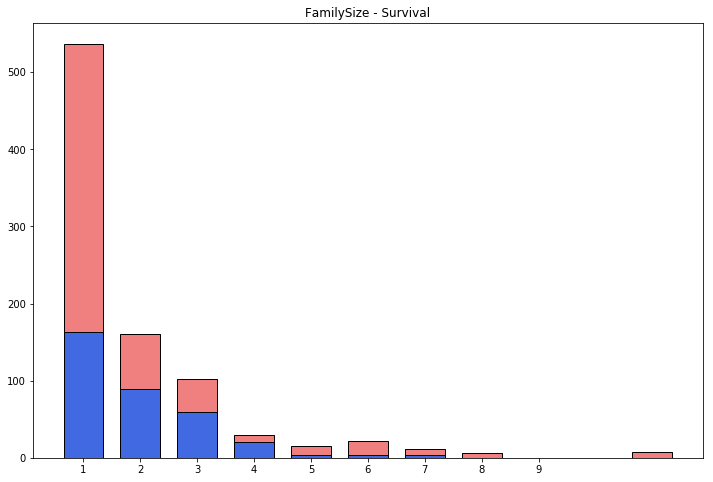

In [32]:
ind = [1, 2, 3, 4, 5, 6, 7, 8, 11]
val1 = list(train[train['Survived']==1].groupby('family_member')['Survived'].count()) + list([0, 0])
val2 = train[train['Survived']==0].groupby('family_member')['Survived'].count()

plt.figure(figsize=(12,8))
plt.bar(ind, val1, color='royalblue', width=0.7, edgecolor='k')
plt.bar(ind, val2, color='lightcoral', width=0.7, bottom=val1, edgecolor='k')

plt.title('FamilySize - Survival')
plt.xticks([i for i in range(1,10)])
plt.show()

In [33]:
def good_family(x):
    temp = dict()
    for i, v in x.iterrows():
        if v['family_member']>=2 & v['family_member']<=4:
            temp[i] = 1
        else:
            temp[i] = 0
    return temp

t = good_family(train)
t_df = pd.DataFrame({'good_family': list(t.values())}, index=list(t.keys()))
t_df.head(3)

,good_family
0,1
1,1
2,1


In [34]:
train = train.merge(t_df, how='left', left_index=True, right_index=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,weak,family_member,good_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16-24,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,32-40,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24-32,1,1,1


In [35]:
dummies = pd.get_dummies(train['Pclass'], prefix='class')
dummies2 = pd.get_dummies(train['Embarked'], prefix='from')
train = train.replace('male', 0).replace('female', 1)
train = train.merge(dummies, how='left', left_index=True, right_index=True).merge(dummies2, how='left', left_index=True, right_index=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age_group,weak,family_member,good_family,class_1,class_2,class_3,from_C,from_Q,from_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,16-24,0,2,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,32-40,1,2,1,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,24-32,1,1,1,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,32-40,1,2,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,32-40,0,1,1,0,0,1,0,0,1


In [36]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age_group,weak,family_member,good_family,class_1,class_2,class_3,from_C,from_Q,from_S
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,...,24-32,0,1,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,...,16-24,1,1,1,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.45,...,NaN,1,4,1,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,...,24-32,0,1,1,1,0,0,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,...,24-32,0,1,1,0,0,1,0,1,0


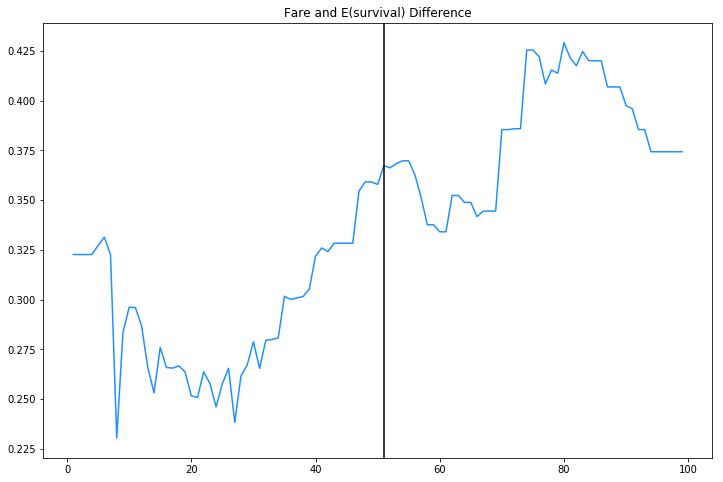

In [37]:
x = [train[train['Fare']>=i]['Survived'].mean() - train[train['Fare']<i]['Survived'].mean() for i in range(100)]

plt.figure(figsize=(12,8))
plt.plot(list(range(100)), x, color='dodgerblue')
plt.title('Fare and E(survival) Difference')
plt.axvline(x=51, color='k')

In [38]:
def above_51(x):
    return 1 if x>=51 else 0

train['high_fare'] = train['Fare'].apply(above_51)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,weak,family_member,good_family,class_1,class_2,class_3,from_C,from_Q,from_S,high_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,2,1,0,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,2,1,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,0,0,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,2,1,1,0,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,1,0,0,1,0,0,1,0


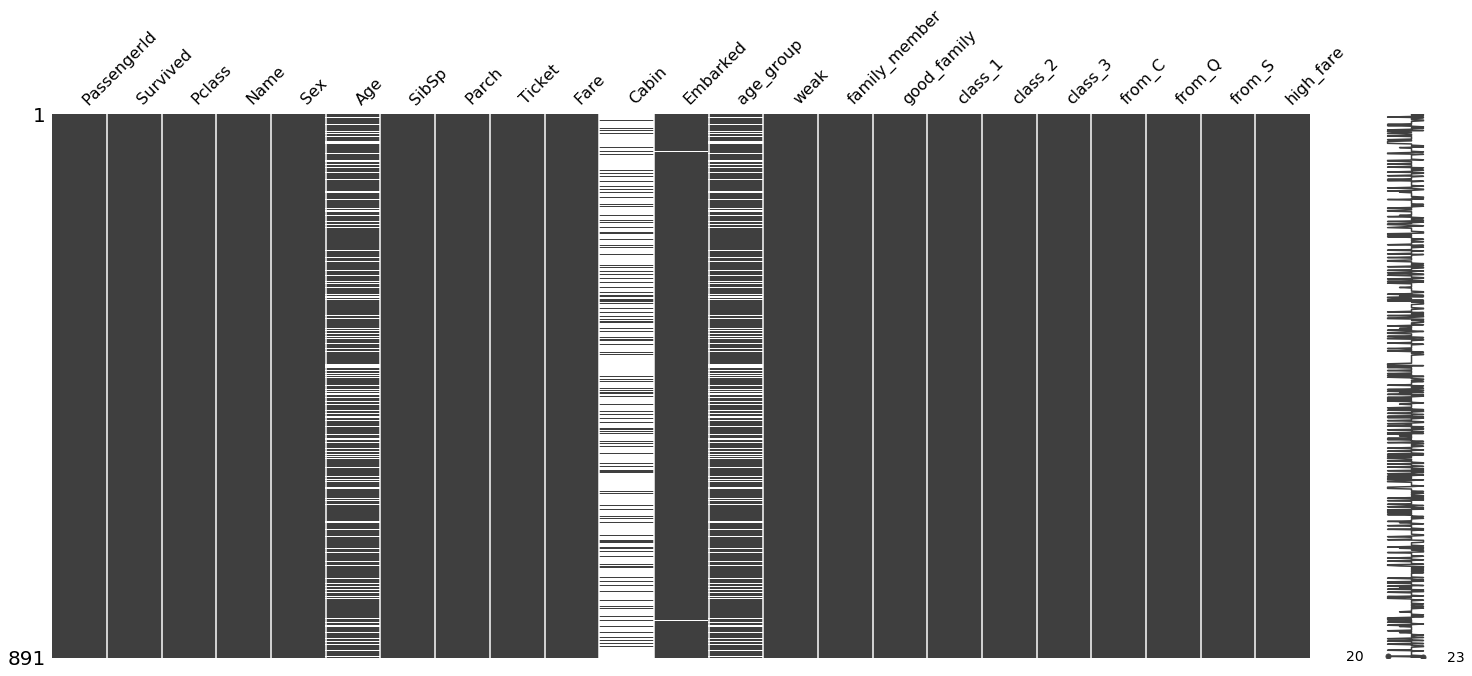

In [39]:
msno.matrix(train)

In [40]:
test_features.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [41]:
train_features = train[test_features.columns]
features_comb = pd.concat([train_features, test_features], ignore_index=True)
features_comb.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [42]:
features_comb.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


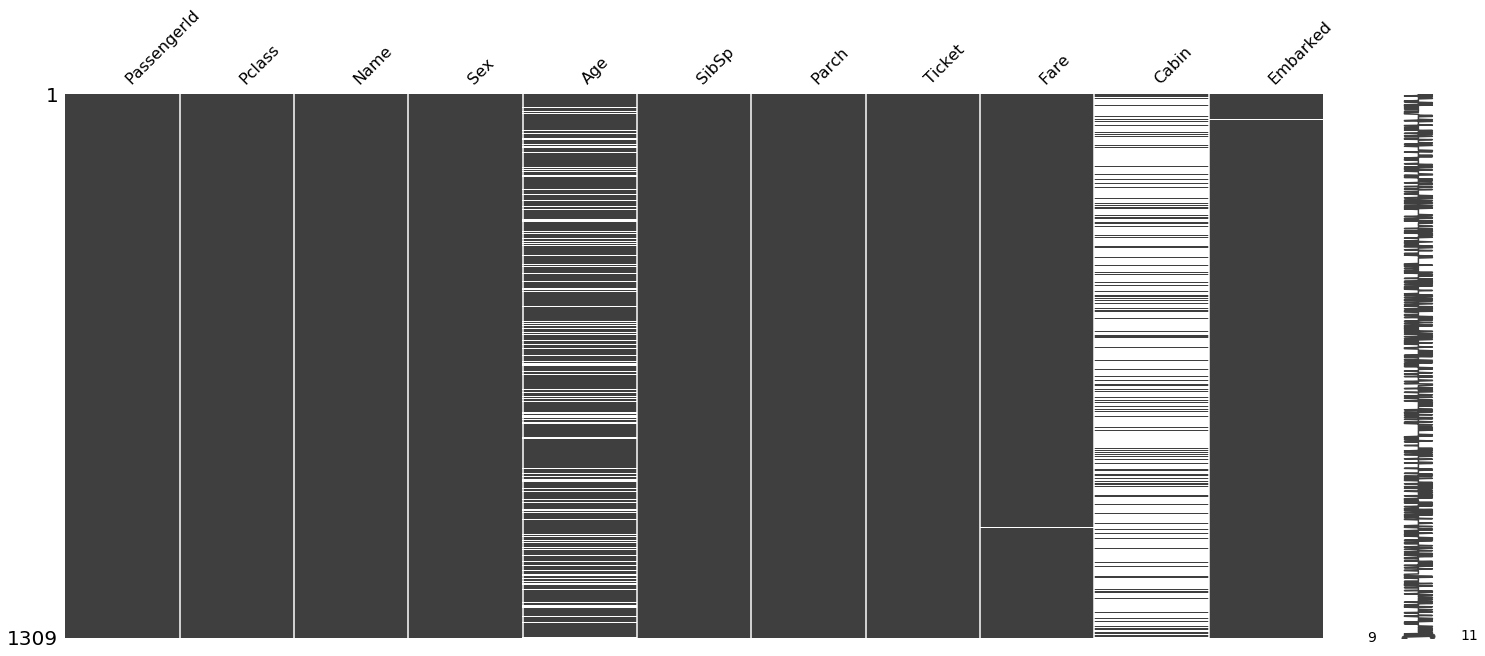

In [43]:
msno.matrix(features_comb)

<BarContainer object of 9 artists>

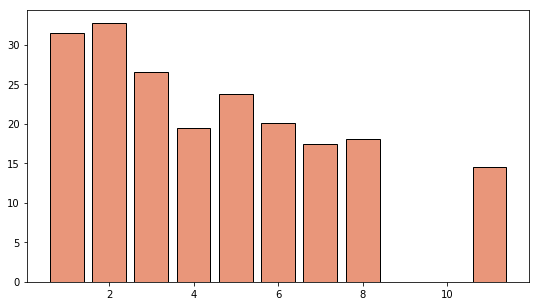

In [44]:
features_comb['family_size'] = features_comb['SibSp'] + features_comb['Parch'] + 1

feat = features_comb.dropna(subset=['Age','Fare'])

plt.figure(figsize=(9,5))
plt.bar(feat.groupby('family_size')['Age'].mean().index, feat.groupby('family_size')['Age'].mean(), color='darksalmon', edgecolor='k')

<BarContainer object of 7 artists>

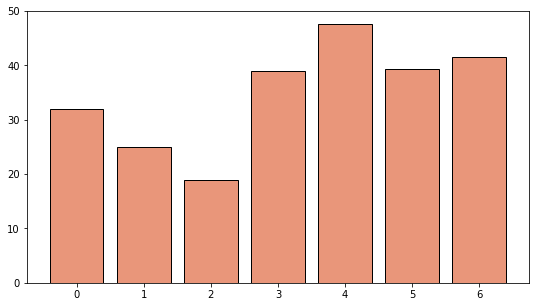

In [45]:
plt.figure(figsize=(9,5))
plt.bar(feat.groupby('Parch')['Age'].mean().index, feat.groupby('Parch')['Age'].mean(), color='darksalmon', edgecolor='k')

<BarContainer object of 7 artists>

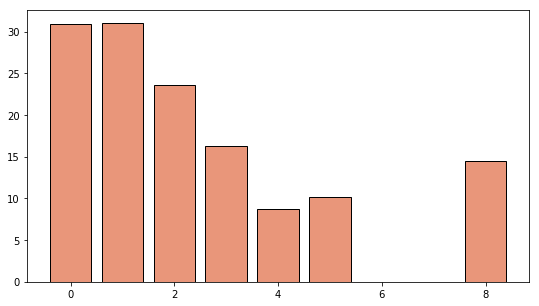

In [46]:
plt.figure(figsize=(9,5))
plt.bar(feat.groupby('SibSp')['Age'].mean().index, feat.groupby('SibSp')['Age'].mean(), color='darksalmon', edgecolor='k')

In [47]:
feat[feat['Age']<=10]['Name']

7                 Palsson, Master. Gosta Leonard
10               Sandstrom, Miss. Marguerite Rut
16                          Rice, Master. Eugene
24                 Palsson, Miss. Torborg Danira
43      Laroche, Miss. Simonne Marie Anne Andree
                          ...                   
1198                   Aks, Master. Philip Frank
1245     Dean, Miss. Elizabeth Gladys Millvina""
1270                 Asplund, Master. Carl Edgar
1280                 Palsson, Master. Paul Folke
1300                   Peacock, Miss. Treasteall
Name: Name, Length: 86, dtype: object

In [48]:
feat[feat['Age']>60]['Name']

33                                  Wheadon, Mr. Edward H
54                         Ostby, Mr. Engelhart Cornelius
96                              Goldschmidt, Mr. George B
116                                  Connors, Mr. Patrick
170                             Van der hoef, Mr. Wyckoff
252                             Stead, Mr. William Thomas
275                     Andrews, Miss. Kornelia Theodosia
280                                      Duane, Mr. Frank
326                             Nysveen, Mr. Johan Hansen
438                                     Fortune, Mr. Mark
456                             Millet, Mr. Francis Davis
483                                Turkula, Mrs. (Hedwig)
493                               Artagaveytia, Mr. Ramon
545                          Nicholson, Mr. Arthur Ernest
555                                    Wright, Mr. George
570                                    Harris, Mr. George
625                                 Sutton, Mr. Frederick
630           

In [49]:
def title_parser(x):
    for i in range(len(x.split())):
        cand = x.split()[i]
        if x.split()[i][-1] == '.':
            return x.split()[i][:-1]

titles = feat['Name'].apply(title_parser)
set(titles)

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [50]:
feat.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2


In [51]:
feat['title'] = titles
feat.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,title
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss


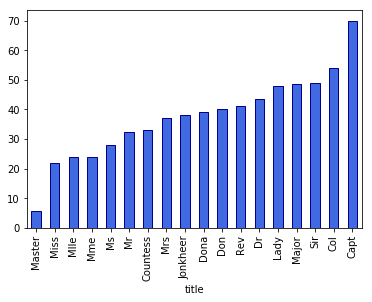

In [52]:
feat.groupby('title')['Age'].mean().sort_values().plot(kind='bar', color='royalblue', edgecolor='darkblue')

In [53]:
100* feat['Age'].value_counts() / len(feat)

24.00    4.497608
22.00    4.114833
21.00    3.923445
30.00    3.827751
18.00    3.732057
           ...   
23.50    0.095694
22.50    0.095694
74.00    0.095694
80.00    0.095694
0.67     0.095694
Name: Age, Length: 97, dtype: float64

In [54]:
feat['age_group'] = pd.cut(feat['Age'], [8*x for x in range(11)], labels=['0-8', '8-16', '16-24', '24-32', '32-40',
                                                                   '40-48', '48-56', '56-64', '64-72', '72-100'])

In [55]:
100 * feat['age_group'].value_counts() / len(feat)

16-24     26.220096
24-32     23.923445
32-40     15.406699
40-48     10.334928
0-8        6.889952
48-56      6.220096
8-16       5.933014
56-64      3.827751
64-72      0.956938
72-100     0.287081
Name: age_group, dtype: float64

In [56]:
100 * feat['Embarked'].value_counts() / len(feat)

S    74.736842
C    20.287081
Q     4.784689
Name: Embarked, dtype: float64

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,weak,family_member,good_family,class_1,class_2,class_3,from_C,from_Q,from_S,high_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,2,1,0,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,2,1,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,0,0,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,2,1,1,0,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,1,0,0,1,0,0,1,0


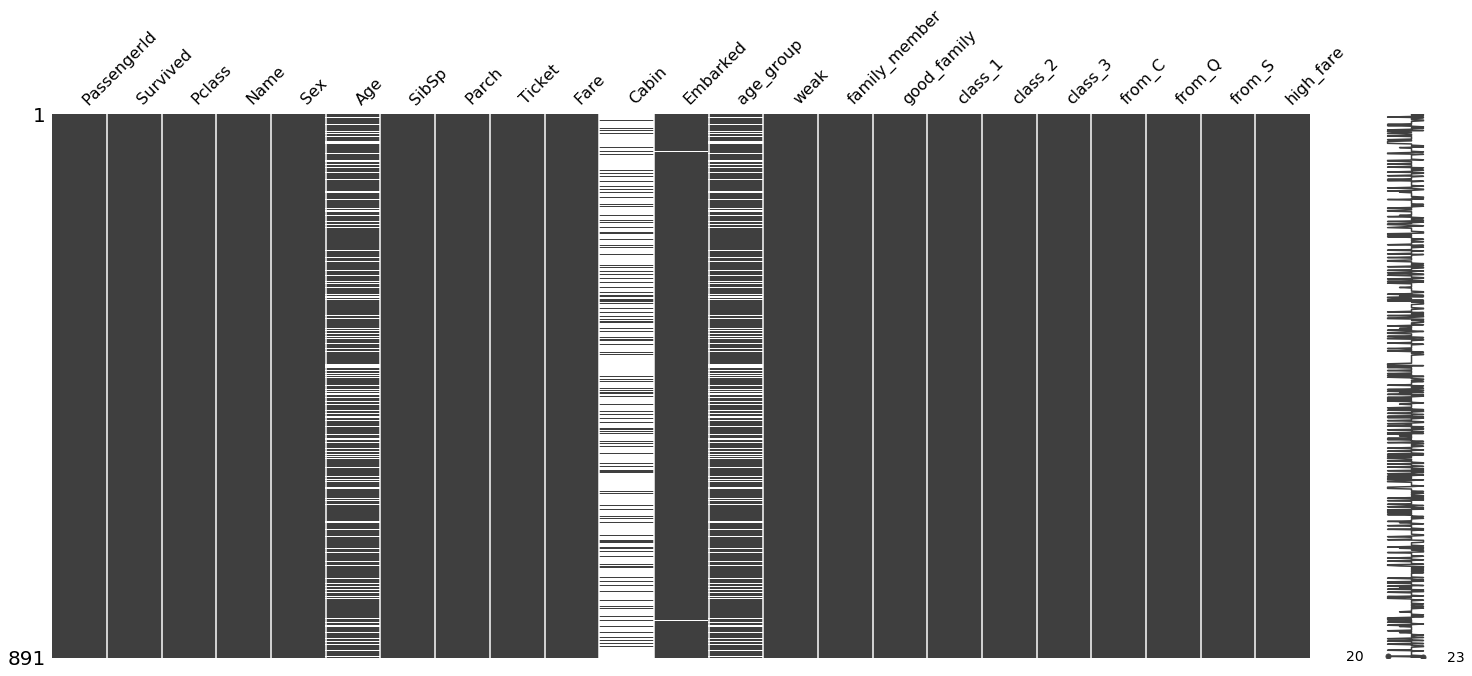

In [58]:
msno.matrix(train)

In [59]:
train['Age'] = train['Age'].replace(np.nan, 24)
train['age_group'] = train['age_group'].replace(np.nan, '16-24')
train['Embarked'] = train['Embarked'].replace(np.nan, 'C')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,weak,family_member,good_family,class_1,class_2,class_3,from_C,from_Q,from_S,high_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,2,1,0,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,2,1,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,0,0,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,2,1,1,0,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,1,0,0,1,0,0,1,0


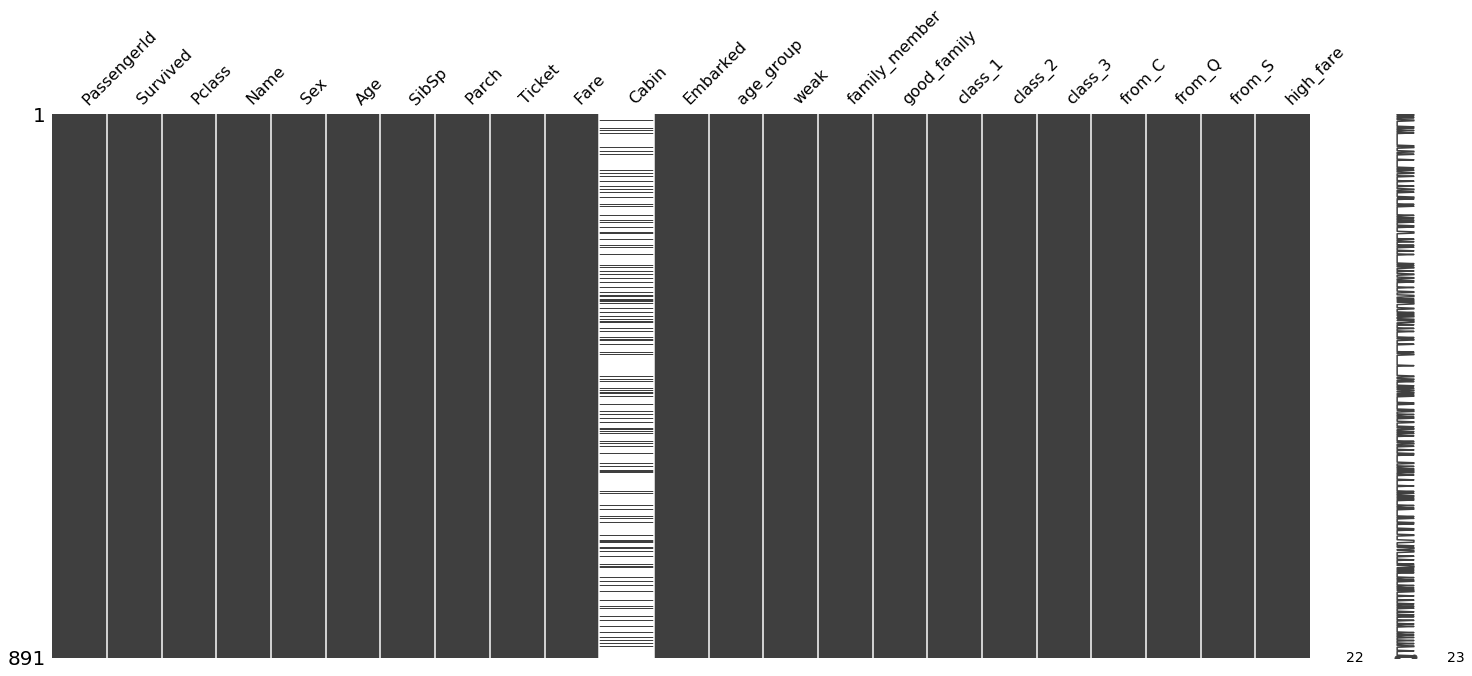

In [60]:
msno.matrix(train)

In [61]:
dummies = pd.get_dummies(train['Embarked'], prefix='from')
train = train.drop(columns=['from_C', 'from_Q', 'from_S'])
train = train.merge(dummies, left_index=True, right_index=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,weak,family_member,good_family,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,2,1,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,2,1,1,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,2,1,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,1,0,0,1,0,0,0,1


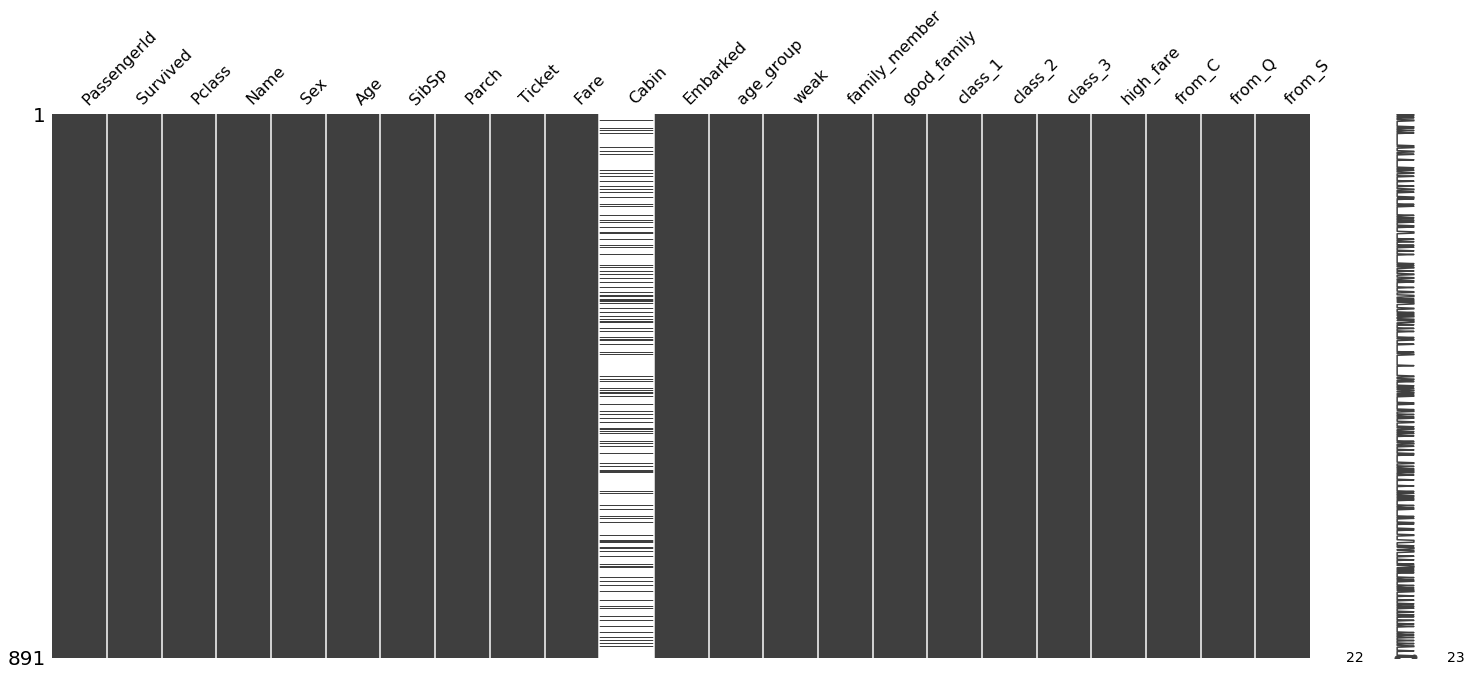

In [62]:
msno.matrix(train)

In [63]:
# train.drop(columns = ['Cabin'], inplace=True)
train['title'] = train['Name'].apply(title_parser)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,family_member,good_family,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,1,0,0,1,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,1,1,0,0,1,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,1,0,0,0,1,Miss


In [64]:
train[['Sex', 'weak']]

,Sex,weak
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,1,1
889,0,0


In [65]:
test_features['Age'] = test_features['Age'].replace(np.nan, 24)
test_features['Sex'] = test_features['Sex'].replace('male', 0).replace('female', 1)
test_features['age_group'] = pd.cut(test_features['Age'], [8*x for x in range(11)], labels=['0-8', '8-16', '16-24', '24-32', '32-40',
                                                                   '40-48', '48-56', '56-64', '64-72', '72-100'])
test_features['family_member'] = test_features['SibSp'] + test_features['Parch'] + 1
test_features['title'] = test_features['Name'].apply(title_parser)
test_features['high_fare'] = test_features['Fare'].apply(above_51)
test_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,family_member,title,high_fare
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,32-40,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,40-48,2,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,56-64,1,Mr,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,24-32,1,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,16-24,3,Mrs,0


In [66]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group', 'weak',
       'family_member', 'good_family', 'class_1', 'class_2', 'class_3',
       'high_fare', 'from_C', 'from_Q', 'from_S', 'title'],
      dtype='object')

In [67]:
def weak_ones(df):
    temp = dict()
    for i, v in df.iterrows():
        if (v['age_group'] in ['0-8', '72-100']) | (v['Sex'] == 1):
            temp[i] = 1
        else:
            temp[i]= 0
    return temp
            
    
def good_family(x):
    tempp = dict()
    for i, v in x.iterrows():
        if (v['family_member']>=2) & (v['family_member']<=4):
            tempp[i] = 1
        else:
            tempp[i] = 0
    return tempp

dic1 = weak_ones(test_features)
dic2 = good_family(test_features)

df1 = pd.DataFrame({'weak': list(dic1.values())}, index=list(dic1.keys()))
df2 = pd.DataFrame({'good_family': list(dic2.values())}, index=list(dic2.keys()))

tf = test_features.merge(df1, left_index=True, right_index=True).merge(df2, left_index=True, right_index=True)
tf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,family_member,title,high_fare,weak,good_family
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,32-40,1,Mr,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,40-48,2,Mrs,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,56-64,1,Mr,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,24-32,1,Mr,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,16-24,3,Mrs,0,1,1


In [68]:
dicts = good_family(train)
df = pd.DataFrame({'good_family': list(dicts.values())}, index=list(dicts.keys()))
# train.drop(columns=['good_family'], inplace=True)
tr = train.merge(df, how='left', left_index=True, right_index=True)
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,good_family_x,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family_y
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,0,0,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,1,0,0,1,1,0,0,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,1,0,0,1,0,0,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,0,1,0,0,0,1,Mr,0


In [72]:
tr.drop(columns=['good_family_x'], inplace=True)
tr.rename(columns={'good_family_y': 'good_family'}, inplace=True)

In [74]:
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,family_member,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,0,0,1,0,0,0,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,1,0,0,1,1,0,0,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,2,1,0,0,1,0,0,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,0,1,0,0,0,1,Mr,0


In [75]:
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group', 'weak',
       'family_member', 'class_1', 'class_2', 'class_3', 'high_fare', 'from_C',
       'from_Q', 'from_S', 'title', 'good_family'],
      dtype='object')

In [76]:
tf.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'age_group', 'family_member', 'title',
       'high_fare', 'weak', 'good_family'],
      dtype='object')

In [69]:
tf.drop(columns=['Cabin'], inplace=True)
dum = pd.get_dummies(tf['Embarked'], prefix='from')
dumm = pd.get_dummies(tf['Pclass'], prefix='class')
tf_ = tf.merge(dum, left_index=True, right_index=True).merge(dumm, left_index=True, right_index=True)
tf_.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,title,high_fare,weak,good_family,from_C,from_Q,from_S,class_1,class_2,class_3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,...,Mr,0,0,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,...,Mrs,0,1,1,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,...,Mr,0,0,0,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,...,Mr,0,0,0,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,...,Mrs,0,1,1,0,0,1,0,0,1


In [73]:
pd.concat([tr, tf_]).isna().sum()

Age                 0
Cabin            1105
Embarked            0
Fare                1
Name                0
Parch               0
PassengerId         0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
age_group           0
class_1             0
class_2             0
class_3             0
family_member       0
from_C              0
from_Q              0
from_S              0
good_family         0
high_fare           0
title               0
weak                0
dtype: int64

In [77]:
tr.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,family_member,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,0,0,1,0,0,0,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,1,0,0,1,1,0,0,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,1,Miss,0


In [78]:
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group', 'weak',
       'family_member', 'class_1', 'class_2', 'class_3', 'high_fare', 'from_C',
       'from_Q', 'from_S', 'title', 'good_family'],
      dtype='object')

In [79]:
tr_ = tr.drop(columns=['Name', 'Ticket', 'Embarked', 'Pclass'])
tf_.drop(columns=['Name', 'Ticket', 'Embarked', 'Pclass'], inplace=True)

tr_.head(3)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,age_group,weak,family_member,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family
0,1,0,0,22.0,1,0,7.2500,NaN,16-24,0,2,0,0,1,0,0,0,1,Mr,1
1,2,1,1,38.0,1,0,71.2833,C85,32-40,1,2,1,0,0,1,1,0,0,Mrs,1
2,3,1,1,26.0,0,0,7.9250,NaN,24-32,1,1,0,0,1,0,0,0,1,Miss,0


In [80]:
tf_.head(3)

,PassengerId,Sex,Age,SibSp,Parch,Fare,age_group,family_member,title,high_fare,weak,good_family,from_C,from_Q,from_S,class_1,class_2,class_3
0,892,0,34.5,0,0,7.8292,32-40,1,Mr,0,0,0,0,1,0,0,0,1
1,893,1,47.0,1,0,7.0000,40-48,2,Mrs,0,1,1,0,0,1,0,0,1
2,894,0,62.0,0,0,9.6875,56-64,1,Mr,0,0,0,0,1,0,0,1,0


In [81]:
set(tr_.title)

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [ ]:
tr_.groupby('title')['Survived'].mean().sort_values().plot(kind='bar', color='royalblue', edgecolor='darkblue', figsize=(9,5))

In [ ]:
tr_.groupby('title')['Fare'].mean().sort_values().plot(kind='bar', color='royalblue', edgecolor='darkblue', figsize=(9,5))

In [82]:
tr_[tr_['title']=='Don']

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,age_group,weak,family_member,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family
30,31,0,0,40.0,0,0,27.7208,NaN,32-40,0,1,1,0,0,0,1,0,0,Don,0


In [ ]:
train.groupby('Pclass')['title'].value_counts()

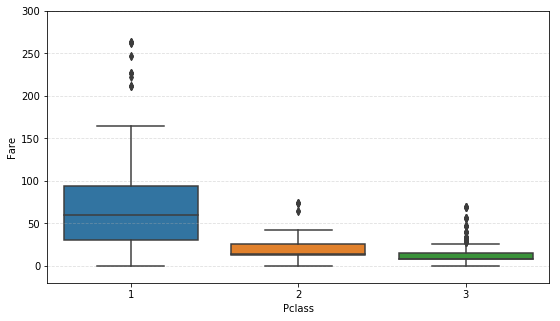

In [83]:
plt.figure(figsize=(9,5))
sns.boxplot(data=train, x='Pclass', y='Fare')
plt.ylim(-20, 300)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [ ]:
tr_[tr_['Age']<16]['title'].value_counts()

In [ ]:
set(tr_.title)

In [84]:
def title_class(x):
    if x in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif x in ['Countess', 'Don', 'Jonkheer', 'Lady', 'Sir']:
        return 'Royalty'
    elif x in ['Dr', 'Rev']:
        return 'Job'
    elif x in ['Miss', 'Master']:
        return 'Child'
    else:
        return 'Mr&Mrs'
    
tr_['title'] = tr_['title'].apply(title_class)
tf_['title'] = tf_['title'].apply(title_class)

tr_.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,age_group,weak,family_member,class_1,class_2,class_3,high_fare,from_C,from_Q,from_S,title,good_family
0,1,0,0,22.0,1,0,7.2500,NaN,16-24,0,2,0,0,1,0,0,0,1,Mr&Mrs,1
1,2,1,1,38.0,1,0,71.2833,C85,32-40,1,2,1,0,0,1,1,0,0,Mr&Mrs,1
2,3,1,1,26.0,0,0,7.9250,NaN,24-32,1,1,0,0,1,0,0,0,1,Child,0
3,4,1,1,35.0,1,0,53.1000,C123,32-40,1,2,1,0,0,1,0,0,1,Mr&Mrs,1
4,5,0,0,35.0,0,0,8.0500,NaN,32-40,0,1,0,0,1,0,0,0,1,Mr&Mrs,0


In [85]:
dummy = pd.get_dummies(tr_['title'], prefix='title')
dummy2 = pd.get_dummies(tf_['title'], prefix='title')

training = tr_.merge(dummy, left_index=True, right_index=True)
testing = tf_.merge(dummy2, left_index=True, right_index=True)

In [86]:
training.head(3)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,age_group,weak,...,from_C,from_Q,from_S,title,good_family,title_Child,title_Job,title_Mr&Mrs,title_Officer,title_Royalty
0,1,0,0,22.0,1,0,7.2500,NaN,16-24,0,...,0,0,1,Mr&Mrs,1,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,C85,32-40,1,...,1,0,0,Mr&Mrs,1,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,NaN,24-32,1,...,0,0,1,Child,0,1,0,0,0,0


In [87]:
label = training['Survived']
feature = training[['Sex', 'SibSp', 'Parch', 'Age', 'Fare', 'weak', 'family_member', 'class_1', 'class_2', 'class_3', 
                    'high_fare', 'from_C', 'from_Q', 'from_S', 'good_family', 'title_Officer', 'title_Royalty', 'title_Job', 'title_Child', 'title_Mr&Mrs']]

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import random

r = random.randint(0, 1000)
r2 = random.randint(0, 1000)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=r)



model = rfc(random_state = r2)
parameters = {'n_estimators': [50+25*i for i in range(10)], 'max_depth' : [i for i in range(1, 10)], 'criterion' : ('gini', 'entropy')}

srch = GridSearchCV(model, parameters, cv=5)

srch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [105]:
srch.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 250}

In [107]:
srch.best_score_

0.8441011235955056

In [120]:
model = srch.best_estimator_
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("이 모델의 정확도는 {:.2f}%입니다.".format(100*accuracy))
model.feature_importances_

이 모델의 정확도는 79.89%입니다.


array([2.22314075e-01, 3.17303707e-02, 1.26557964e-02, 2.85021337e-02,
       8.03409363e-02, 2.48522543e-01, 4.53813631e-02, 3.92884785e-02,
       1.03519193e-02, 7.10563253e-02, 2.55572056e-02, 9.49780507e-03,
       2.97579162e-03, 8.36018758e-03, 2.13715560e-02, 1.72744252e-03,
       3.21486714e-05, 1.66393171e-03, 7.55217268e-02, 6.31482632e-02])

In [128]:
r2 = random.randint(1,1000)
model2 = rfc(n_estimators=200, max_depth=4, random_state=r2)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc = accuracy_score(pred2, y_test)
print("이 모델의 정확도는 {:.2f}%입니다.".format(100*acc))

이 모델의 정확도는 79.33%입니다.


In [130]:
testing.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'age_group',
       'family_member', 'title', 'high_fare', 'weak', 'good_family', 'from_C',
       'from_Q', 'from_S', 'class_1', 'class_2', 'class_3', 'title_Child',
       'title_Job', 'title_Mr&Mrs', 'title_Officer'],
      dtype='object')

In [131]:
feature_test = testing[['Sex', 'SibSp', 'Parch', 'Age', 'Fare', 'weak', 'family_member', 'class_1', 'class_2', 'class_3', 
                    'high_fare', 'from_C', 'from_Q', 'from_S', 'good_family', 'title_Officer', 'title_Job', 'title_Child', 'title_Mr&Mrs']]

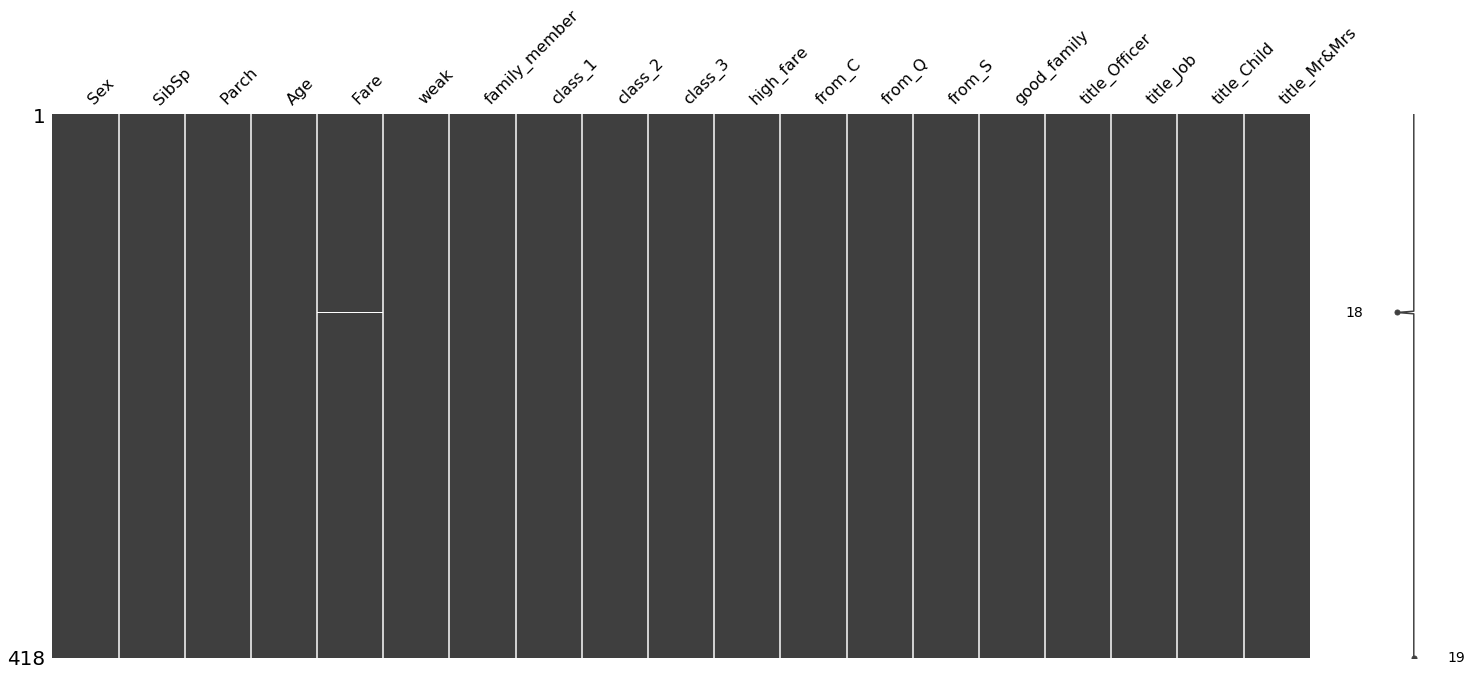

In [133]:
msno.matrix(feature_test)

In [134]:
train.Fare.mean()

32.2042079685746

In [135]:
feature_test = feature_test.replace(np.nan, 32.204)

In [137]:
feature_test['title_Royalty'] = np.zeros(len(feature_test))

In [138]:
prediction = model.predict(feature_test)

In [140]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [141]:
prediction.mean()

0.5669856459330144

In [142]:
pred.mean()

0.36312849162011174

In [143]:
testing.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,age_group,family_member,title,high_fare,...,from_C,from_Q,from_S,class_1,class_2,class_3,title_Child,title_Job,title_Mr&Mrs,title_Officer
0,892,0,34.5,0,0,7.8292,32-40,1,Mr&Mrs,0,...,0,1,0,0,0,1,0,0,1,0
1,893,1,47.0,1,0,7.0000,40-48,2,Mr&Mrs,0,...,0,0,1,0,0,1,0,0,1,0
2,894,0,62.0,0,0,9.6875,56-64,1,Mr&Mrs,0,...,0,1,0,0,1,0,0,0,1,0
3,895,0,27.0,0,0,8.6625,24-32,1,Mr&Mrs,0,...,0,0,1,0,0,1,0,0,1,0
4,896,1,22.0,1,1,12.2875,16-24,3,Mr&Mrs,0,...,0,0,1,0,0,1,0,0,1,0


In [145]:
submission = testing[['PassengerId', 'Sex']]
submission['Survived'] = prediction
submission.head()

,PassengerId,Sex,Survived
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1


In [146]:
submission.drop(columns='Sex', inplace=True)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [147]:
submission.to_csv('submission2.csv', index=False)